## Analysis of algorithms that make exact recovery of the cluster structure in GBM
Model description is [here](https://arxiv.org/pdf/1709.05510.pdf)

Candidate algorithms are: 
1. Motif-counting algorithm (from the above paper) and its modification from [here](https://arxiv.org/abs/1804.05013)
2. Spectral clustering with a smart choice of the optimal eigenvectors (k-means around optimal value)
3. Expansion algorithm described in my draft [here](https://www.overleaf.com/project/5e9483ae085e6600014af805)

Here we try the idea to cut first a graph and then apply Spectral Clustering + k-means

Last update: 30/05/2020

## Main conclusion:
### Cutting doesn't help because it worsens the spectrum. Graph does not become and only this could help

### This notebook uses the classes.py file where principal classes and functions are defined

File classes.py is on autoreload

In [1]:
import pandas as pd
import numpy as np
import networkx as nx
import random
import matplotlib.pyplot as plt
import seaborn as sns
from classes_spectral_cutting import GBM_graph, Motif_Counting_second_paper, Expansion_algorithm, Spectral_k_means, Spectral_clustering, Spectral_cutting, Spectral_cutting_2, Spectral_cutting_3, Spectral_cutting_4, Spectral_cutting_8, Common_neigbours_labeling, simulation, full_simulation, k_means_analysis
import tqdm
import time 
import warnings
import copy
warnings.filterwarnings("ignore")
%matplotlib inline

%load_ext autoreload
%autoreload 2

#### First of all, let us check that distances to some fixed node correspond to coordinates of vertices

In [2]:
G = GBM_graph(n_1 = 2000, n_2 = 2000, a = 15, b = 6)

In [3]:
p = nx.shortest_path_length(G, source=0)

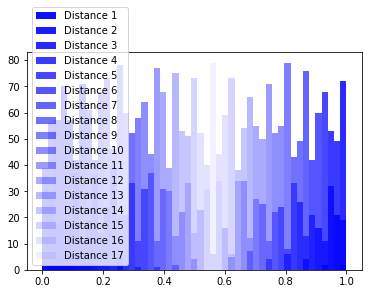

In [4]:
distances = set(p.values()) - set([0])
max_d = max(distances)
newBins = np.linspace(0, 1, 50)
for d in distances:
    sns.distplot([G.nodes[node]["coordinate"] for node in G.nodes if p[node] == d], 
                 label = "Distance " + str(d), 
                 color = 'blue', 
                 hist_kws=dict(alpha=1 - d/(max_d + 1)),
                 bins = newBins,
                 kde = False)
    plt.legend()

#### Even on the relatively small graph the cutting doesn't help. That's because with the cutting we lose the 100% concentrated on one vector. 

In [13]:
G = GBM_graph(n_1 = 1000, n_2 = 1000, a = 18, b = 5)

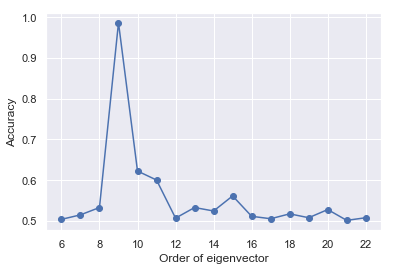

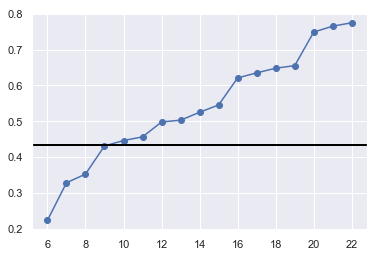

In [17]:
k_means_analysis(G, vectors = [], vectors_disp = True)

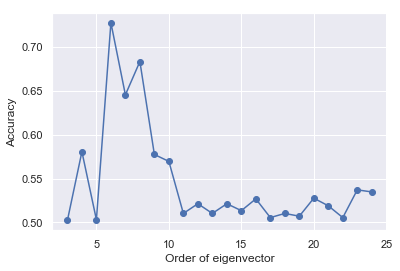

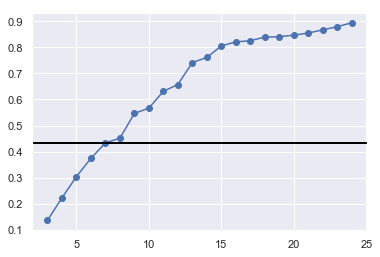

Relabeled
Accuracy = 0.850
Accuracy cut labels = 0.850


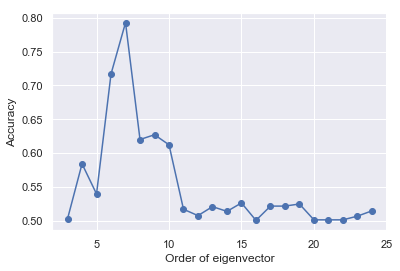

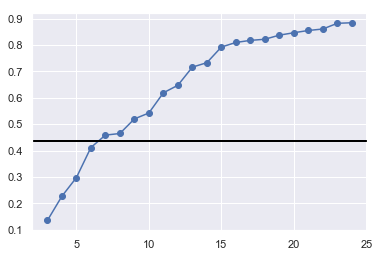

Not relabeled
Accuracy = 0.830
Accuracy cut labels = 0.734


In [16]:
Spectral_cutting(G,2)

#### In order to make experiments more representative let us try it for different $a$ with 10 trials. As we see, the quality really drops

a = 7, b = 5, n = 2000, Spectral_k_means = 57.0% (7sec), Spectral_cutting_2 = 61.0% (29sec), Spectral_cutting_3 = 61.0% (28sec), Spectral_cutting_4 = 61.0% (28sec), Spectral_cutting_8 = 61.0% (28sec), 
a = 8, b = 5, n = 2000, Spectral_k_means = 82.0% (10sec), Spectral_cutting_2 = 82.0% (34sec), Spectral_cutting_3 = 82.0% (34sec), Spectral_cutting_4 = 84.0% (33sec), Spectral_cutting_8 = 84.0% (33sec), 
a = 9, b = 5, n = 2000, Spectral_k_means = 78.0% (11sec), Spectral_cutting_2 = 87.0% (36sec), Spectral_cutting_3 = 87.0% (35sec), Spectral_cutting_4 = 87.0% (35sec), Spectral_cutting_8 = 85.0% (36sec), 
a = 10, b = 5, n = 2000, Spectral_k_means = 89.0% (9sec), Spectral_cutting_2 = 78.0% (36sec), Spectral_cutting_3 = 77.0% (36sec), Spectral_cutting_4 = 78.0% (36sec), Spectral_cutting_8 = 77.0% (37sec), 
a = 11, b = 5, n = 2000, Spectral_k_means = 89.0% (9sec), Spectral_cutting_2 = 83.0% (38sec), Spectral_cutting_3 = 85.0% (38sec), Spectral_cutting_4 = 84.0% (38sec), Spectral_cutting_8 = 84

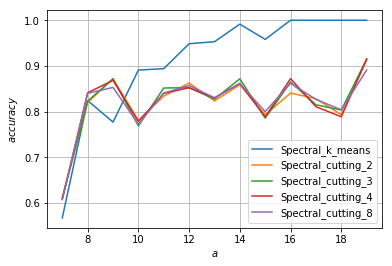

In [8]:
fs1000 = full_simulation([Spectral_k_means, Spectral_cutting_2, Spectral_cutting_3, Spectral_cutting_4, Spectral_cutting_8], 
                b = 5, 
                a_start = 7, 
                a_finish = 20, 
                a_step = 1, 
                n_1 = 1000, 
                n_2 = 1000,
                n_trials = 10)